In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

world_cup_matches = pd.read_csv("C:\\Users\\ianfr\\Documents\\dev\\inteligencia-computacional\\dataset\\WorldCupMatches.csv")
world_cup_matches.drop_duplicates()
world_cup_matches.dropna()
world_cup_matches = world_cup_matches[world_cup_matches.index <= 851]
world_cup_matches['Year'] = world_cup_matches['Year'].astype(int)
world_cup_matches = world_cup_matches[['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Year',]].rename(
    columns={'Year': 'year', 'Home Team Name': 'home_team', 'Home Team Goals':'home_score', 'Away Team Goals': 'away_score', 'Away Team Name': 'away_team'})
world_cup_matches = world_cup_matches[(world_cup_matches.year) >= 1990]
world_cup_matches.head()

,home_team,home_score,away_score,away_team,year
412,Argentina,0.0,1.0,Cameroon,1990
413,Soviet Union,0.0,2.0,Romania,1990
414,"rn"">United Arab Emirates",0.0,2.0,Colombia,1990
415,Italy,1.0,0.0,Austria,1990
416,USA,1.0,5.0,Czechoslovakia,1990


In [32]:
world_cup_matches.mean()

home_score       1.359091
away_score       1.109091
year          2002.981818
dtype: float64

C:\Users\ianfr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


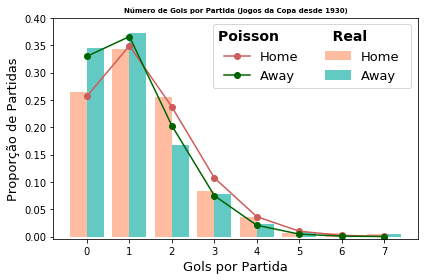

[[2.56894211e-01 3.29858696e-01]
 [3.49142587e-01 3.65843281e-01]
 [2.37258258e-01 2.02876729e-01]
 [1.07485180e-01 7.50029119e-02]
 [3.65205329e-02 2.07962619e-02]
 [9.92694485e-03 4.61298901e-03]
 [2.24860342e-03 8.52704029e-04]
 [4.36579495e-04 1.35103755e-04]]


In [33]:
poisson_pred = np.column_stack([[poisson.pmf(i, world_cup_matches.mean()[j]) for i in range(8)] for j in range(2) ])

plt.hist(world_cup_matches[['home_score', 'away_score']].values, range(9),
        alpha=0.7, label=['Home', 'Away'], normed=True, color=["#FFA07A", "#20B2AA"])

pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Real        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Gols por Partida",size=13)
plt.ylabel("Proporção de Partidas",size=13)
plt.title("Número de Gols por Partida (Jogos da Copa desde 1930)",size=7,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()
print(poisson_pred)

In [4]:
skellam_pred = [skellam.pmf(i,  world_cup_matches.mean()[0],  world_cup_matches.mean()[1]) for i in range(-6,8)]

plt.hist(world_cup_matches[['Home Team Goals']].values - world_cup_matches[['Away Team Goals']].values, range(-6,8), 
         alpha=0.7, label='Real',normed=True)
plt.plot([i+0.5 for i in range(-6,8)], skellam_pred,
                  linestyle='-', marker='o',label="Skellam", color = '#CD5C5C')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in range(-6,8)],[i for i in range(-6,8)])
plt.xlabel("Home Team Goals - Away Team Goals",size=13)
plt.ylabel("Proporção de Partidas",size=13)
plt.title("Diferença entre Gols Marcados (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

KeyError: "None of [Index(['Home Team Goals'], dtype='object')] are in the [columns]"

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([world_cup_matches[['home_team','away_team','home_score']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent','home_score':'goals'}),
           world_cup_matches[['away_team','home_team','away_score']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent','away_score':'goals'})])
#print(goal_model_data)
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  880
Model:                            GLM   Df Residuals:                      742
Model Family:                 Poisson   Df Model:                          137
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1142.4
Date:                Sun, 06 Oct 2019   Deviance:                       820.65
Time:                        00:47:32   Pearson chi2:                     699.
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -0.0237      0.480     -0.049      0.961      -0.964       0.917
team[T.Angola]                            -1.0830      1.079     -1.003      0.316      -3.199       1.033
team[T.Argentina]                          0.2825      0.394      0.717      0.473      -0.489       1.054
team[T.Australia]                          0.3193      0.480      0.665      0.506      -0.622       1.261
team[T.Austria]                           -0.1013      0.586     -0.173      0.863      -1.249       1.047
team[T.Belgium]                            0.1567      0.411      0.381      0.703      -0.649       0.962
team[T.Bolivia]                           -1.0545      1.066     -0.989      0.323      -3.145       1.036
team[T.Brazil]                             0.5834      0.386      1.513      0.130      -0.173       1.339
team[T.Bulgaria]                           0.1460      0.481      0.304      0.761      -0.796       1.088
team[T.Cameroon]                          -0.0791      0.441     -0.180      0.858      -0.943       0.784
team[T.Chile]                              0.1650      0.455      0.363      0.717      -0.726       1.056
team[T.China PR]                         -21.3826   1.61e+04     -0.001      0.999   -3.15e+04    3.15e+04
team[T.Colombia]                           0.2270      0.425      0.534      0.593      -0.606       1.060
team[T.Costa Rica]                         0.0337      0.444      0.076      0.939      -0.836       0.903
team[T.Croatia]                            0.2468      0.434      0.569      0.570      -0.604       1.097
team[T.Czech Republic]                     0.1304      0.693      0.188      0.851      -1.227       1.488
team[T.Czechoslovakia]                     0.8893      0.499      1.784      0.074      -0.088       1.866
team[T.C�te d'Ivoire]                      0.0899      0.475      0.189      0.850      -0.841       1.021
team[T.Denmark]                            0.3196      0.444      0.719      0.472      -0.551       1.191
team[T.Ecuador]                            0.1127      0.491      0.230      0.818      -0.849       1.074
team[T.Egypt]                             -0.6285      1.073     -0.586      0.558      -2.731       1.474
team[T.England]                            0.2416      0.407      0.594      0.552      -0.555       1.039
team[T.France]                             0.2790      0.406      0.688      0.492      -0.516       1.074
team[T.Germany]                            0.8373      0.382      2.191      0.028       0.088       1.586
team[T.Germany FR]                         0.8795      0.476      1.848      0.065      -0.053       1.812
team[T.Ghana]                              0.1541      0.465      0.332      0.740     

In [35]:
def team_preds(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return team_pred

def simulate_match(team_pred):
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

team_pred = team_preds(poisson_model, 'Brazil', 'Argentina', max_goals=3)
simulate_match(team_pred)

array([[0.11409207, 0.1343693 , 0.07912517, 0.03106261],
       [0.11329601, 0.13343176, 0.07857308, 0.03084588],
       [0.05625275, 0.06625038, 0.03901243, 0.01531533],
       [0.01862008, 0.02192937, 0.01291341, 0.00506949]])

In [36]:
simulate_match(team_pred)

array([[0.11409207, 0.1343693 , 0.07912517, 0.03106261],
       [0.11329601, 0.13343176, 0.07857308, 0.03084588],
       [0.05625275, 0.06625038, 0.03901243, 0.01531533],
       [0.01862008, 0.02192937, 0.01291341, 0.00506949]])

In [37]:
bra_arg = simulate_match(poisson_model, 'Brazil', 'Argentina', max_goals=3)
np.sum(np.tril(bra_arg, -1))

TypeError: simulate_match() got an unexpected keyword argument 'max_goals'

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

def model_metrics(team_preds, dataframe, poisson_model):
    yreal = []
    ypred = []
    team_pred = []
    i = 0
    for index, row in dataframe.iterrows():
        team_pred = team_preds(poisson_model, row['team'], row['opponent'], max_goals=3)
        #print(team_pred)
        yreal.append(row['goals'])
        ypred.append(team_pred[0].index(max(team_pred[0])))
    #print(yreal)
    #print(ypred)
    rms = math.sqrt(mean_squared_error(yreal, ypred))
    r2 = r2_score(yreal, ypred)
    return rms, r2

metrics = model_metrics(team_preds, goal_model_data, poisson_model)

In [39]:
print(metrics)

(1.1798497593106736, 0.033741946355647534)


In [ ]:
np.sum(np.diag(bra_arg))

In [ ]:
np.sum(np.triu(bra_arg, 1))

In [ ]:
brazil_home = world_cup_matches[(world_cup_matches['home_team']=='Brazil')]
brazil_away = world_cup_matches[(world_cup_matches['away_team']=='Brazil')]
brazil = world_cup_matches[(world_cup_matches['home_team']=='Brazil') | (world_cup_matches['away_team']=='Brazil')]

In [ ]:
brazil_home.mean()
# brazil.mean()

In [ ]:
arg_away = world_cup_matches[(world_cup_matches['away_team']=='Argentina')]

In [ ]:
arg_away.mean()

In [ ]:
arg_away.head()

In [ ]:
print(world_cup_matches.info())

In [ ]:
len(world_cup_matches['Home Team Name'].unique().tolist())

In [ ]:
len(world_cup_matches['Away Team Name'].unique().tolist())

In [ ]:
seaborn.set()
full = pd.read_csv("C:\\Users\\ianfr\\Documents\\dev\\inteligencia-computacional\\dataset\\WorldCupMatches.csv")
seaborn.catplot(x="Home Team Goals", y="Away Team Goals", hue="Home Team Initials",
           data=full);

In [ ]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
seaborn.boxplot(x="Home Team Initials", y="Home Team Goals", data=full, ax=axes[0])
seaborn.scatterplot(x="Away Team Initials", y="Away Team Goals", data=full, ax=axes[1]);

In [ ]:
brazil = world_cup_matches[(world_cup_matches['Home Team Name']=='Brazil') | (world_cup_matches['Away Team Name']=='Brazil')]
seaborn.boxplot(x="Home Team Name", y="Away Team Goals", data=brazil_home)

In [ ]:
seaborn.jointplot(x="Home Team Goals", y="Away Team Goals", data=world_cup_matches);


In [ ]:
seaborn.pairplot(data=world_cup_matches, hue="Away Team Goals");

In [ ]:
world_cup_matches.duplicated()

In [ ]:
world_cup_matches.drop_duplicates(keep='last',inplace=False)
world_cup_matches.tail()


In [ ]:
world_cup_matches = pd.read_csv("C:\\Users\\ianfr\\Documents\\dev\\inteligencia-computacional\\dataset\\WorldCupMatches.csv")
world_cup_matches = world_cup_matches[['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name']]
world_cup_matches.drop_duplicates(keep='last',inplace=True)
world_cup_matches.mean()

In [ ]:
poisson_pred = np.column_stack([[poisson.pmf(i, world_cup_matches.mean()[j]) for i in range(8)] for j in range(2)])

plt.hist(world_cup_matches[['Home Team Goals', 'Away Team Goals']].values, range(9),
        alpha=0.7, label=['Home', 'Away'], normed=True, color=["#FFA07A", "#20B2AA"])

pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Real        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Gols por Partida",size=13)
plt.ylabel("Proporção de Partidas",size=13)
plt.title("Número de Gols por Partida (Jogos da Copa desde 1930)",size=7,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()

In [ ]:
skellam_pred = [skellam.pmf(i,  world_cup_matches.mean()[0],  world_cup_matches.mean()[1]) for i in range(-6,8)]

plt.hist(world_cup_matches[['Home Team Goals']].values - world_cup_matches[['Away Team Goals']].values, range(-6,8), 
         alpha=0.7, label='Real',normed=True)
plt.plot([i+0.5 for i in range(-6,8)], skellam_pred,
                  linestyle='-', marker='o',label="Skellam", color = '#CD5C5C')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in range(-6,8)],[i for i in range(-6,8)])
plt.xlabel("Home Team Goals - Away Team Goals",size=13)
plt.ylabel("Proporção de Partidas",size=13)
plt.title("Diferença entre Gols Marcados (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

In [ ]:
brazil_home = world_cup_matches[(world_cup_matches['Home Team Name']=='Brazil')]
brazil_home.mean()

In [ ]:
arg_away = world_cup_matches[(world_cup_matches['Away Team Name']=='Argentina')]
arg_away.mean()

In [ ]:
world_cup_matches.info()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([world_cup_matches[['Home Team Name','Away Team Name','Home Team Goals']].assign(home=1).rename(
            columns={'Home Team Name':'team', 'Away Team Name':'opponent','Home Team Goals':'goals'}),
           world_cup_matches[['Away Team Name','Home Team Name','Away Team Goals']].assign(home=0).rename(
            columns={'Away Team Name':'team', 'Home Team Name':'opponent','Away Team Goals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

In [ ]:
simulate_match(poisson_model, 'Brazil', 'Argentina', max_goals=3)

In [ ]:
brazil_home.info()

In [ ]:
brazil_away = world_cup_matches[(world_cup_matches['Away Team Name']=='Brazil')]

In [ ]:
brazil_away.info()

In [ ]:
world_cup_matches[['Home Team Goals', 'Away Team Goals']].mean()

In [ ]:
seaborn.jointplot(x="Home Team Goals", y="Away Team Goals", data=world_cup_matches);


In [ ]:
print(world_cup_matches['home_team'].unique().tolist())